In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [3]:
dfc = pd.read_csv('data/candidate_result.csv')
dfc.head()

,seat,year,party,name,votes,votes_pc,winner
0,Dhaka-3,2008,BNP,Gayeshwar Chandra Roy,70680.0,36.71,no
1,Dhaka-6,1991,Independent,Sayed Sharafat Hossain,8.0,0.01,no
2,Dhaka-6,1991,Jatiya Janata Party (Asad),Md. Afzalul Huq Afzal,9.0,0.01,no
3,Comilla-3,2001,Independent,Md. Ainul Haque,12.0,0.01,no
4,Dhaka-5,1991,Jatiyatabadi Gonotantrik Chashi Dal,Afzaluddin Chowdhury,14.0,0.01,no


In [4]:
dfc.shape

(8747, 7)

In [5]:
# only take 1991-2008 election data
dfc = dfc[dfc.year.isin(years)]
dfc.shape

(8183, 7)

### vote win count

In [6]:
# only take winners data
dfcwin = dfc[dfc.winner == 'yes']
dfcwin.shape

(1150, 7)

In [7]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


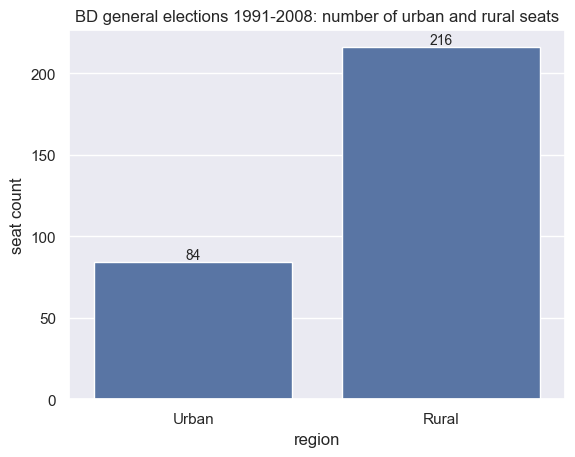

In [8]:
# plot bar chart counting seats of each region
ax = sns.countplot(data=bdmap, x="region")
# add bar label
for cont in ax.containers:
    ax.bar_label(cont, fontsize=10)
# g.fig.subplots_adjust(top=0.85)
ax.set_ylabel('seat count')
ax.set_title('BD general elections 1991-2008: number of urban and rural seats')
ax.get_figure().savefig('fig/mainp_region_count',bbox_inches='tight')

In [9]:
# join data with map data to get region
df_region = pd.merge(bdmap[['seat', 'region']], dfcwin[['seat', 'year', 'party']], how='left', on='seat')
df_region.head()

,seat,region,year,party
0,Panchagarh-1,Urban,1991,BNP
1,Panchagarh-1,Urban,1996,BNP
2,Panchagarh-1,Urban,2001,BNP
3,Panchagarh-1,Urban,2008,AL
4,Panchagarh-2,Rural,1991,CPB


In [10]:
# find win count for each year for each region of each party
dfr = df_region.groupby(['year', 'region', 'party']).size().reset_index(name='count')
dfr.head()

,year,region,party,count
0,1991,Rural,AL,70
1,1991,Rural,BAKSAL,3
2,1991,Rural,BNP,85
3,1991,Rural,CPB,4
4,1991,Rural,Ganatantri Party,1


In [11]:
# only keep AL and BNP data
dfr = dfr[dfr.party.isin(mainp)].copy()
dfr

,year,region,party,count
0,1991,Rural,AL,70
2,1991,Rural,BNP,85
13,1991,Urban,AL,15
15,1991,Urban,BNP,49
20,1996,Rural,AL,107
21,1996,Rural,BNP,75
27,1996,Urban,AL,34
28,1996,Urban,BNP,31
31,2001,Rural,AL,44
33,2001,Rural,BNP,128


In [12]:
dfr.to_csv('dataout/mainp_region_win.csv', index=False)

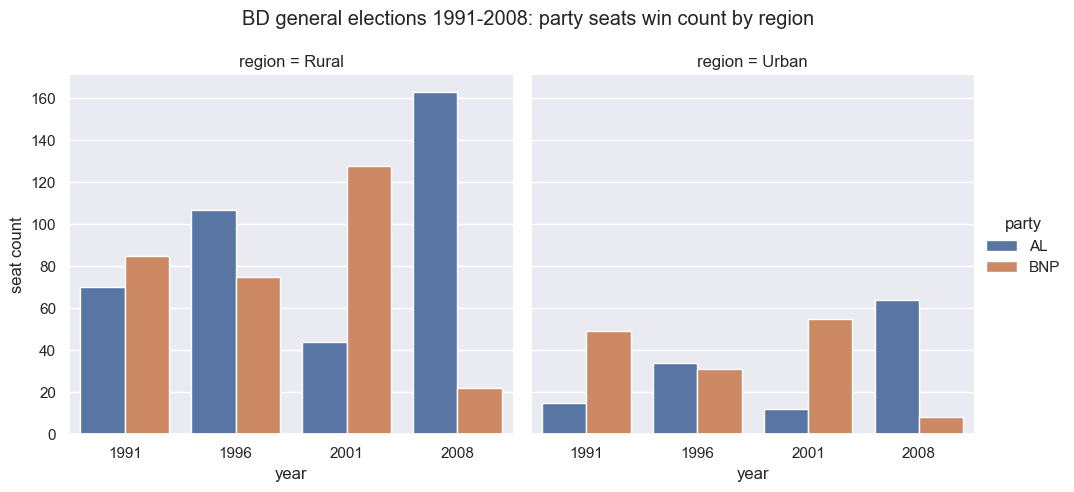

In [13]:
# plot bar chart for each region
g = sns.catplot(x="year", y='count', col="region", hue='party', data=dfr, kind ='bar')
g.fig.subplots_adjust(top=0.85)
g.set_ylabels('seat count')
g.fig.suptitle('BD general elections 1991-2008: party seats win count by region')
g.fig.savefig('fig/mainp_region_win',bbox_inches='tight')

In [14]:
# get average seats won by AL and BNP for each region
dfrm = dfr.groupby(['party', 'region']).mean()['count'].round().reset_index()
dfrm

,party,region,count
0,AL,Rural,96.0
1,AL,Urban,31.0
2,BNP,Rural,78.0
3,BNP,Urban,36.0


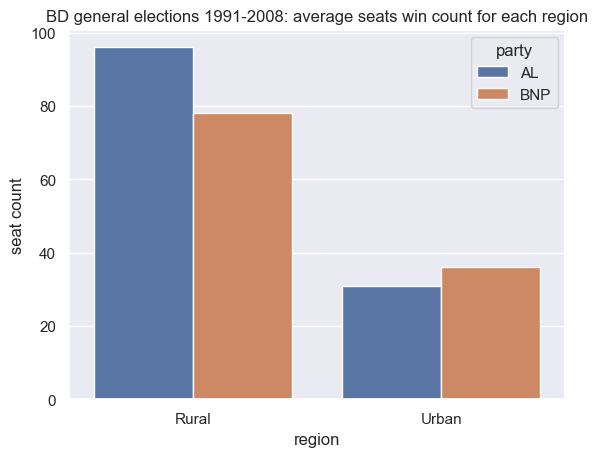

In [15]:
# plot bar chart for average seats won
ax = sns.barplot(x="region", y='count', hue='party', data=dfrm)
ax.set_ylabel('seat count')
ax.set_title('BD general elections 1991-2008: average seats win count for each region')
ax.figure.savefig('fig/mainp_region_win_avg',bbox_inches='tight')

### vote percentage

In [16]:
# only take AL-BNP data
dfcmainp = dfc[dfc.party.isin(mainp)]
dfcmainp.shape

(2118, 7)

In [17]:
dfcmainp = dfcmainp[['seat', 'year', 'party', 'votes_pc']]

In [18]:
# no. of null rows
dfcmainp.isnull().any(axis=1).sum()

56

In [19]:
dfnull = dfcmainp[dfcmainp.isnull().any(axis=1)]
dfnull.head()

,seat,year,party,votes_pc
5779,Lakshmipur-3,1991,AL,NaN
6115,Lakshmipur-3,1991,BNP,NaN
6145,Lakshmipur-3,1996,AL,NaN
6673,Lakshmipur-3,2001,AL,NaN
6706,Lakshmipur-3,1996,BNP,NaN


In [20]:
dfnull.shape

(56, 4)

In [21]:
# form (seat,year) pairs to remove null rows
dfnull_pairs = dfnull.groupby(['seat', 'year']).size().reset_index()
dfnull_pairs['pair'] = dfnull_pairs['seat'] + ',' + dfnull_pairs['year'].map(str)
dfnull_pairs.head()

,seat,year,0,pair
0,Bagerhat-4,1996,1,"Bagerhat-4,1996"
1,Bagerhat-4,2008,1,"Bagerhat-4,2008"
2,Bandarban,1991,1,"Bandarban,1991"
3,Bandarban,1996,1,"Bandarban,1996"
4,Chapai Nawabganj-2,1991,1,"Chapai Nawabganj-2,1991"


In [22]:
# form (seat,year) pairs to remove null rows
dfcmainp['pair'] = dfcmainp['seat'] + ',' + dfcmainp['year'].map(str)
dfcmainp.head()

,seat,year,party,votes_pc,pair
0,Dhaka-3,2008,BNP,36.71,"Dhaka-3,2008"
2989,Sylhet-6,2001,BNP,0.32,"Sylhet-6,2001"
3032,Comilla-10,2008,BNP,0.27,"Comilla-10,2008"
3135,Noakhali-6,2008,BNP,0.48,"Noakhali-6,2008"
3163,Rangpur-1,1991,BNP,0.78,"Rangpur-1,1991"


In [23]:
# remove null rows
dfcmainp = dfcmainp[~dfcmainp['pair'].isin(dfnull_pairs.pair)]
dfcmainp.shape

(2062, 5)

In [28]:
# join data with map data to get region
df_region = pd.merge(bdmap[['seat', 'region']], dfcmainp, how='right', on='seat')
df_region = df_region[['seat', 'region', 'year', 'party', 'votes_pc']]
df_region.head()

,seat,region,year,party,votes_pc
0,Dhaka-3,Urban,2008,BNP,36.71
1,Sylhet-6,Rural,2001,BNP,0.32
2,Comilla-10,Rural,2008,BNP,0.27
3,Noakhali-6,Rural,2008,BNP,0.48
4,Rangpur-1,Rural,1991,BNP,0.78


In [29]:
df_region.to_csv('dataout/mainp_region_votepc.csv', index=False)

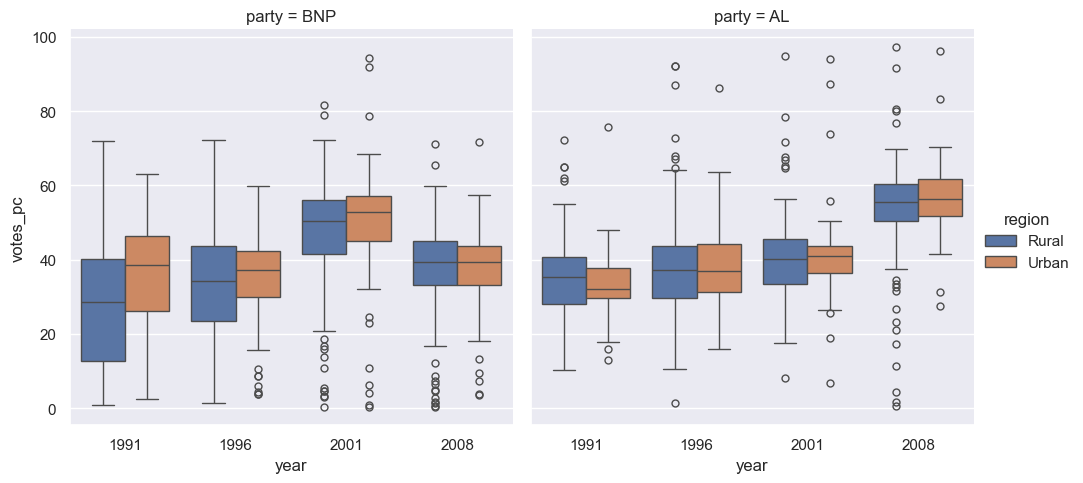

In [33]:
# plot bar chart for vote % distribution of each party in each region
ax = sns.catplot(data=df_region, x='year', y='votes_pc', hue='region', col='party', kind='box')
ax.figure.ylabel = 'vote %'
ax.figure.title = 'BD general elections 1991-2008: vote % for each region for BNP and AL'
ax.figure.savefig('fig/mainp_region_votepc',bbox_inches='tight')

In [25]:
# get avg vote % of each party each region each year
dfr_vpc = df_region.groupby(['year', 'region', 'party'])['votes_pc'].mean().reset_index()
dfr_vpc

,year,region,party,votes_pc
0,1991,Rural,AL,34.802701
1,1991,Rural,BNP,28.003417
2,1991,Urban,AL,33.368154
3,1991,Urban,BNP,35.957083
4,1996,Rural,AL,37.737549
5,1996,Rural,BNP,32.741773
6,1996,Urban,AL,37.732222
7,1996,Urban,BNP,34.329167
8,2001,Rural,AL,40.106482
9,2001,Rural,BNP,47.057907


In [26]:
dfr_vpc.to_csv('dataout/mainp_region_votepc_avg.csv', index=False)

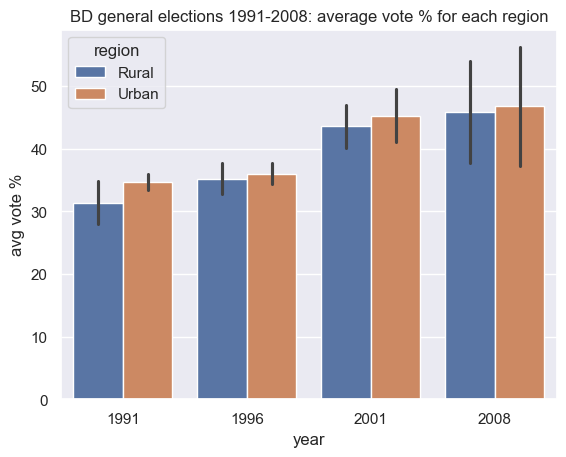

In [27]:
# plot bar chart for average vote % of each party in rural and urban areas
ax = sns.barplot(data=dfr_vpc, x='year', y='votes_pc', hue='region')
ax.set_ylabel('avg vote %')
ax.set_title('BD general elections 1991-2008: average vote % for each region')
ax.figure.savefig('fig/mainp_region_votepc_avg',bbox_inches='tight')